<a href="https://colab.research.google.com/github/rayamajhiumang5-cloud/Applied-Data-analysis-/blob/main/Lab_2_(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the FRED API library
!pip install fredapi

In [3]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='9dfe5827a52d6274b65c9f8c1054c90e ')


In [8]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [9]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


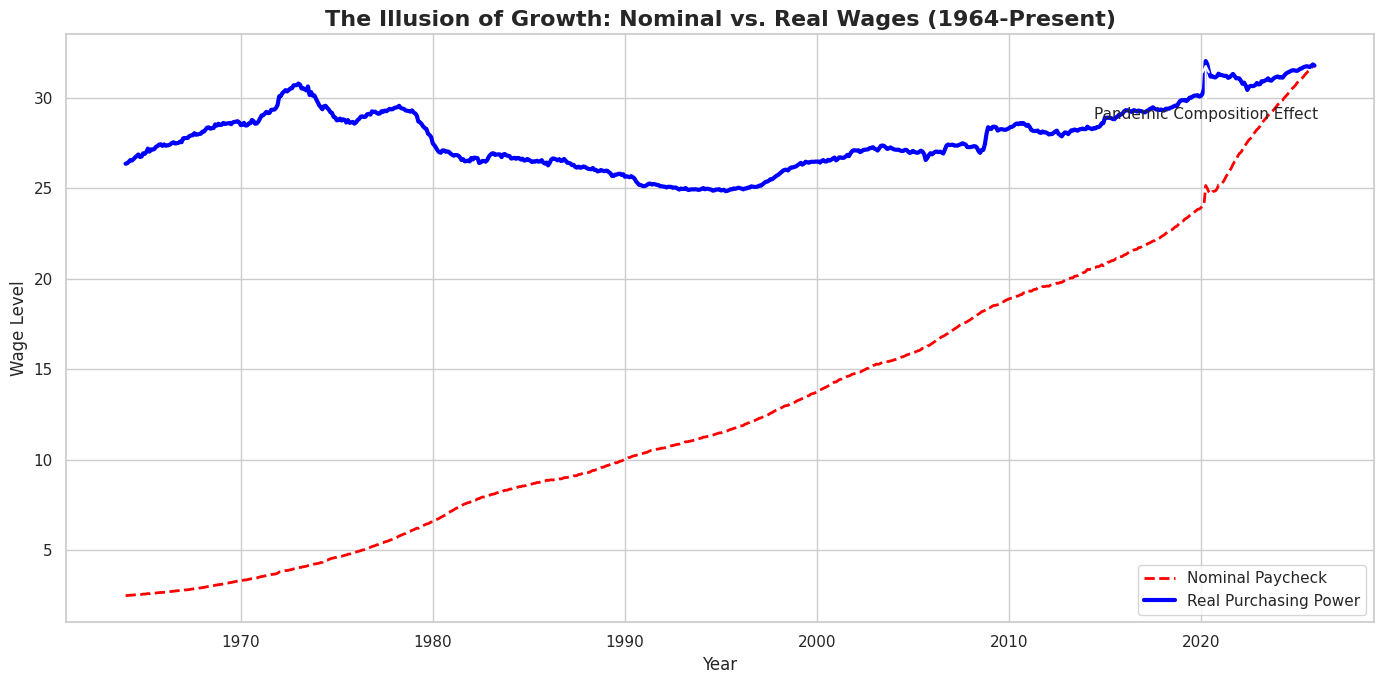

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(14, 7))

# Plot time series
plt.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Paycheck",
)

plt.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Purchasing Power",
)

# Title and labels
plt.title(
    "The Illusion of Growth: Nominal vs. Real Wages (1964-Present)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year")
plt.ylabel("Wage Level")
plt.legend()

# ---- Annotation for 2020 spike in Real Wages ----
# Find the 2020 peak in real wages
real_2020 = df.loc["2020", "Real_Wage"]
peak_date = real_2020.idxmax()
peak_value = real_2020.max()

plt.annotate(
    "Pandemic Composition Effect",
    xy=(peak_date, peak_value),
    xytext=(peak_date, peak_value * 0.9),
    arrowprops={
        "arrowstyle": "->",
        "linewidth": 1.5
    },
    fontsize=11,
    ha="center",
)

plt.tight_layout()
plt.show()

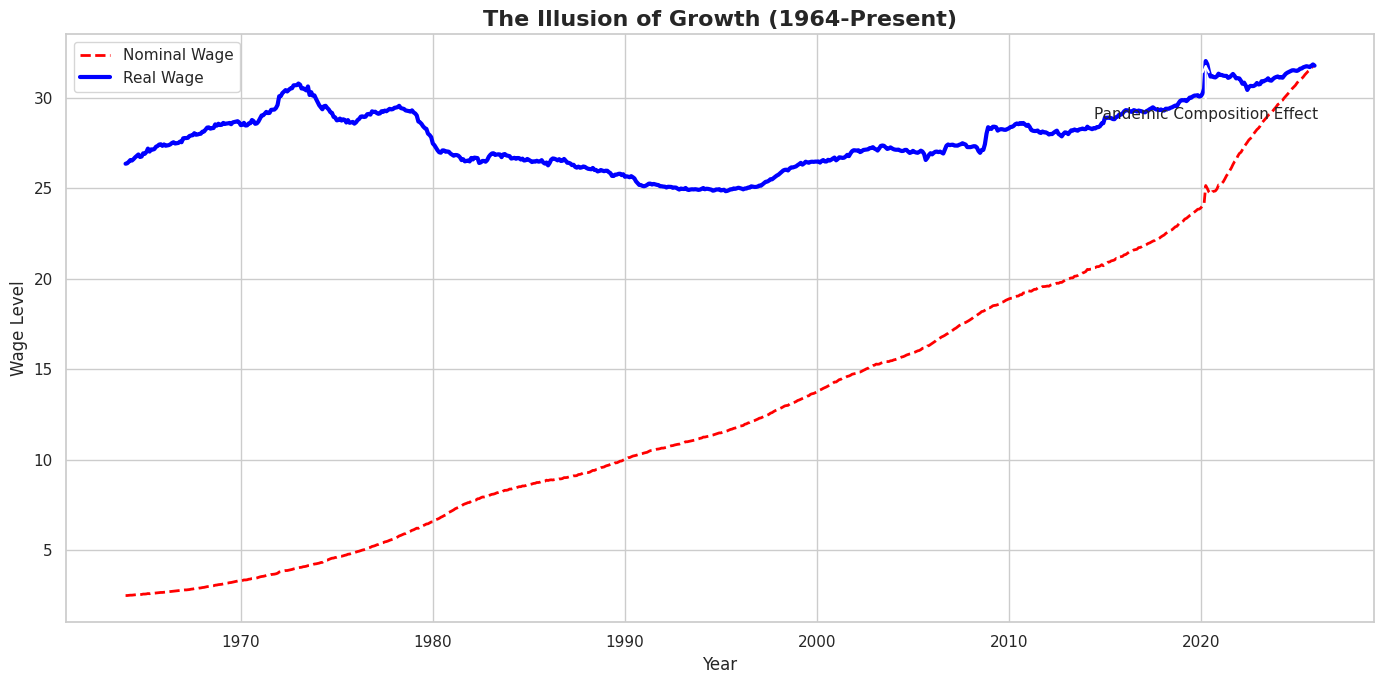

In [11]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(14, 7))

# Plot the series
plt.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage",
)

plt.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage",
)

# Title and labels
plt.title("The Illusion of Growth (1964-Present)", fontsize=16, weight="bold")
plt.xlabel("Year")
plt.ylabel("Wage Level")
plt.legend()

# ---- Annotate the 2020 spike ----
real_2020 = df.loc["2020", "Real_Wage"]
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

plt.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 0.9),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11,
    ha="center",
)

plt.tight_layout()
plt.show()

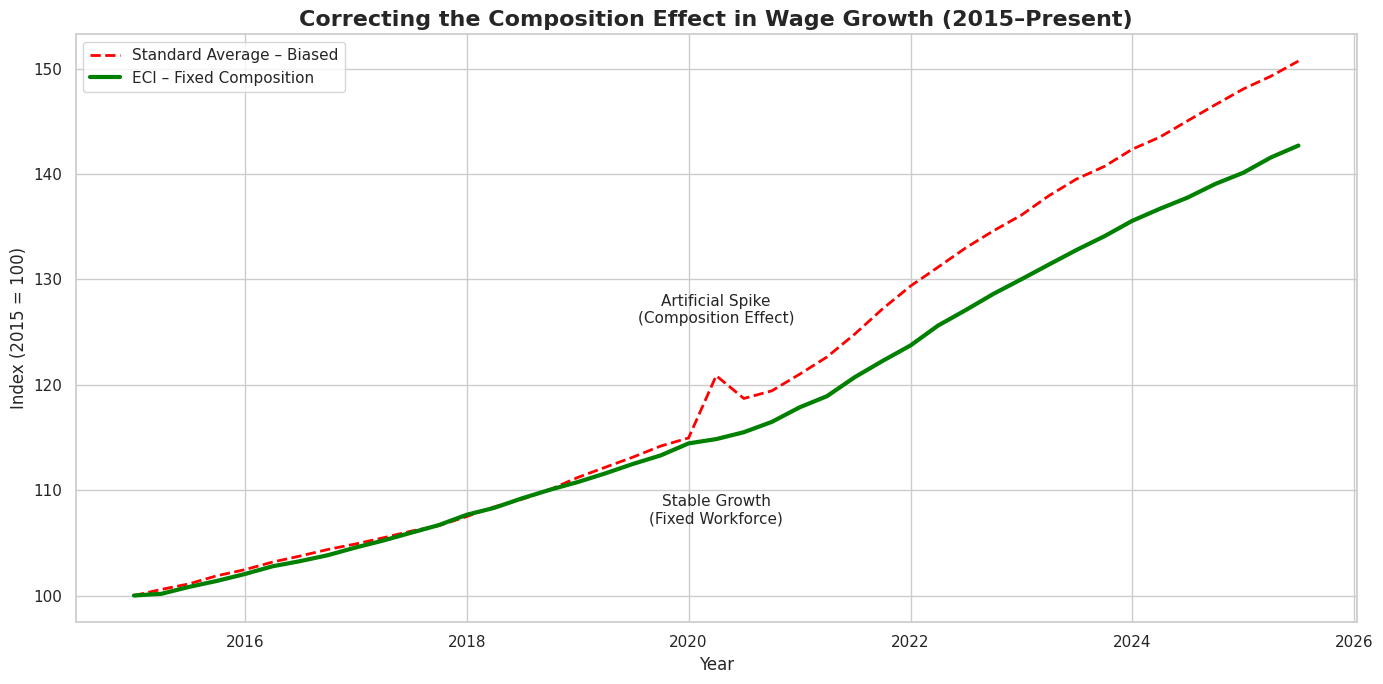

In [12]:
import matplotlib.pyplot as plt

# 1. Fetch ECI series using existing fred object
eci = fred.get_series("ECIWAG")

# 2. Filter both series from 2015-01-01 onwards
start_date = "2015-01-01"
wages_f = wages.loc[start_date:]
eci_f = eci.loc[start_date:]

# Align dates (important for clean comparison)
wages_f, eci_f = wages_f.align(eci_f, join="inner")

# 3. Rebase both series to 100
wages_rebased = (wages_f / wages_f.iloc[0]) * 100
eci_rebased = (eci_f / eci_f.iloc[0]) * 100

# 4. Plot
plt.figure(figsize=(14, 7))

plt.plot(
    wages_rebased.index,
    wages_rebased,
    linestyle="--",
    color="red",
    linewidth=2,
    label="Standard Average – Biased",
)

plt.plot(
    eci_rebased.index,
    eci_rebased,
    linestyle="-",
    color="green",
    linewidth=3,
    label="ECI – Fixed Composition",
)

plt.title("Correcting the Composition Effect in Wage Growth (2015–Present)",
          fontsize=16, weight="bold")
plt.xlabel("Year")
plt.ylabel("Index (2015 = 100)")
plt.legend()

# 5. Annotate 2020 divergence
w_2020 = wages_rebased.loc["2020"]
e_2020 = eci_rebased.loc["2020"]

w_spike_date = w_2020.idxmax()
w_spike_value = w_2020.max()

plt.annotate(
    "Artificial Spike\n(Composition Effect)",
    xy=(w_spike_date, w_spike_value),
    xytext=(w_spike_date, w_spike_value + 5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11,
    ha="center",
)

plt.annotate(
    "Stable Growth\n(Fixed Workforce)",
    xy=(w_spike_date, e_2020.loc[w_spike_date]),
    xytext=(w_spike_date, e_2020.loc[w_spike_date] - 8),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11,
    ha="center",
)

plt.tight_layout()
plt.show()